In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
plt.rcParams['font.size'] = 14

In [22]:
df = pd.read_csv(
    'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_bme_surface-flask_1_ccgg_month.txt',
    delimiter="\s+",skiprows=54, names=['site',	'year',	'month',	'value'])

In [23]:
df

,site,year,month,value
0,BME,1989,2,357.02
1,BME,1989,3,357.73
2,BME,1989,4,358.11
3,BME,1989,5,356.21
4,BME,1989,6,352.76
...,...,...,...,...
232,BME,2008,6,387.78
233,BME,2008,7,386.13
234,BME,2008,8,383.11
235,BME,2008,9,380.76


In [24]:
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1)).dt.to_period('M')


In [25]:
df['date'].dtype

period[M]

In [26]:
df = df.set_index(df['date'])

In [27]:

df

,site,year,month,value,date
date,,,,,
1989-02,BME,1989,2,357.02,1989-02
1989-03,BME,1989,3,357.73,1989-03
1989-04,BME,1989,4,358.11,1989-04
1989-05,BME,1989,5,356.21,1989-05
1989-06,BME,1989,6,352.76,1989-06
...,...,...,...,...,...
2008-06,BME,2008,6,387.78,2008-06
2008-07,BME,2008,7,386.13,2008-07
2008-08,BME,2008,8,383.11,2008-08


Text(0.5, 1.0, 'Monthly Average CO2 Concentration of St. Davids Head, Bermuda, United Kingdom (BME)')

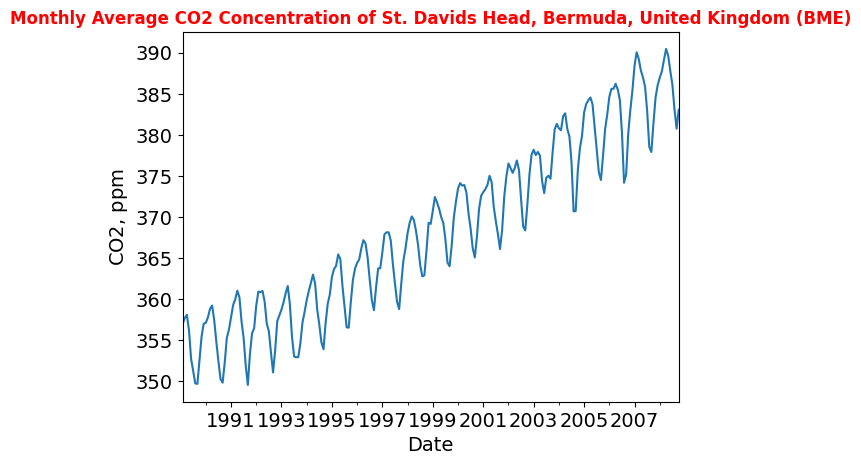

In [39]:
df['value'].plot()
plt.ylabel('CO${2}$, ppm')
plt.xlabel('Date')
plt.title('Monthly Average CO2 Concentration of St. Davids Head, Bermuda, United Kingdom (BME)', fontsize=12, fontweight='bold', color='red')


In [29]:
def discrete_transform(data):
    """Return Discrete Fourier Transform (DFT) of a complex data vector"""
    N = len(data)
    transform = np.zeros(N)
    for k in range(N):
        for j in range(N):
            angle = 2 * np.pi * k * j / N
            transform[k] += data[j] * np.exp(1j * angle)
    return transform

def fft(x):
    N = len(x)
    if N <= 1: return x
    elif N % 2 == 1:         # N is odd, lemma does not apply
        print ('N is ' + str(N) + ', fall back to discrete transform')
        return discrete_transform(x)
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    return np.array( [even[k] + np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] + \
                     [even[k] - np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] )




In [30]:
X= fft(df['value'][-512:])

N is 237, fall back to discrete transform


<ipython-input-29-9d1489f2995c>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  transform[k] += data[j] * np.exp(1j * angle)


Text(0.5, 1.0, 'FFT of Monthly Average CO2 Concentration\n(Logarithmic Scale)')

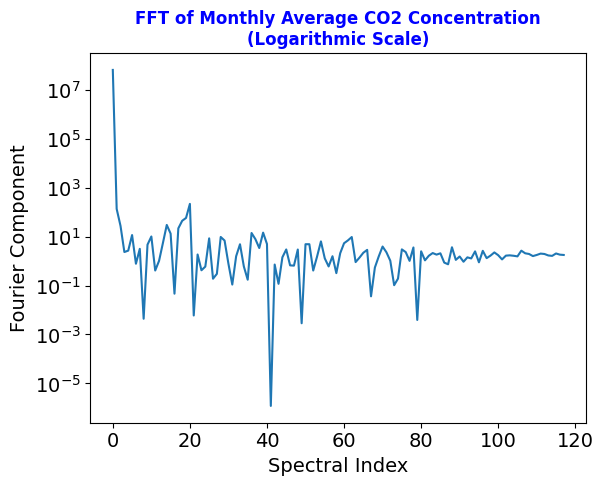

In [42]:
plt.plot(np.abs(X[:int(len(X)/2)])**2/int(len(X)/2))
plt.yscale("log")
plt.ylabel('Fourier Component')
plt.xlabel('Spectral Index')
plt.title('FFT of Monthly Average CO2 Concentration\n(Logarithmic Scale)', fontsize=12, fontweight='bold', color='blue')

#plt.xlim(0,50)

N is 237, fall back to discrete transform


<ipython-input-29-9d1489f2995c>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  transform[k] += data[j] * np.exp(1j * angle)


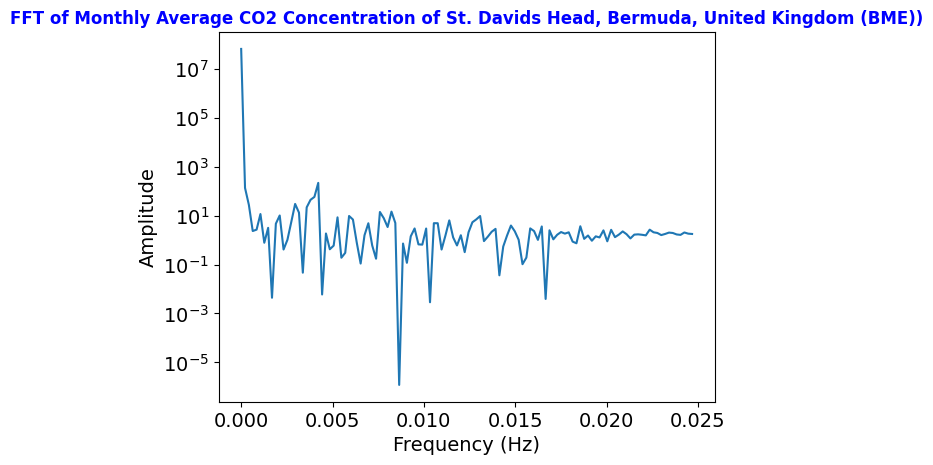

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_frequencies(fft_output, sampling_rate):
    N = len(fft_output)
    frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
    return frequencies

# Assuming df is your DataFrame with a column named 'value'
X = fft(df['value'][-512:])
sampling_rate = 0.05 # Your sampling rate in Hz. 1/x[1]-x[0].
# In our case, x[1]=20, x[0]=0
frequencies = calculate_frequencies(X, sampling_rate)

plt.plot(frequencies[:int(len(X)/2)], np.abs(X[:int(len(X)/2)])**2/int(len(X)/2))
plt.yscale("log")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Monthly Average CO2 Concentration of St. Davids Head, Bermuda, United Kingdom (BME))', fontsize=12, fontweight='bold', color='blue')

plt.show()


In [47]:
import numpy as np
import pandas as pd

def calculate_frequencies(fft_output, sampling_rate):
    N = len(fft_output)
    frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
    return frequencies

# Assuming df is your DataFrame with a column named 'value'
# Sample data creation
data = {'value': np.sin(2 * np.pi * 5 * np.linspace(0, 1, 512)) + 0.5 * np.random.randn(512)}
df = pd.DataFrame(data)

X = np.fft.fft(df['value'][-512:])
sampling_rate = 0.05  # Your sampling rate in Hz. 1/(df.index[1] - df.index[0])

frequencies = calculate_frequencies(X, sampling_rate)

# Find the index of the maximum value in the FFT output
peak_index = np.argmax(np.abs(X))

# Corresponding frequency of the peak
peak_frequency = frequencies[peak_index]

print(f"The frequency of the peak is approximately {peak_frequency} Hz.")


The frequency of the peak is approximately 0.00048828125 Hz.
